In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing training dataset

train = pd.read_csv("trainKNN.txt",header=None)
train.columns=["Id number", "RI", "Na", "Mg", "Al", "Si","K","Ca","Ba",'Fe','Type of glass']
print(train.shape)
train.head()

(196, 11)


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
# importing test dataset

test = pd.read_csv("testKNN.txt",header=None)
test.columns=["Id number", "RI", "Na", "Mg", "Al", "Si","K","Ca","Ba",'Fe','Type of glass']
print(test.shape)
test.head()

(18, 11)


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


# Data Preprocessing

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      196 non-null    int64  
 1   RI             196 non-null    float64
 2   Na             196 non-null    float64
 3   Mg             196 non-null    float64
 4   Al             196 non-null    float64
 5   Si             196 non-null    float64
 6   K              196 non-null    float64
 7   Ca             196 non-null    float64
 8   Ba             196 non-null    float64
 9   Fe             196 non-null    float64
 10  Type of glass  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      18 non-null     int64  
 1   RI             18 non-null     float64
 2   Na             18 non-null     float64
 3   Mg             18 non-null     float64
 4   Al             18 non-null     float64
 5   Si             18 non-null     float64
 6   K              18 non-null     float64
 7   Ca             18 non-null     float64
 8   Ba             18 non-null     float64
 9   Fe             18 non-null     float64
 10  Type of glass  18 non-null     int64  
dtypes: float64(9), int64(2)
memory usage: 1.7 KB


In [7]:
train.duplicated().sum()

0

In [8]:
test.duplicated().sum()

0

In [9]:
train.nunique()

Id number        196
RI               164
Na               136
Mg                90
Al               111
Si               124
K                 65
Ca               133
Ba                30
Fe                28
Type of glass      6
dtype: int64

In [10]:
test.nunique()

Id number        18
RI               17
Na               17
Mg               11
Al               18
Si               18
K                12
Ca               18
Ba                6
Fe                9
Type of glass     6
dtype: int64

In [11]:
train.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,102.862245,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,61.195663,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.000000,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,49.750000,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,101.500000,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,153.250000,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,211.000000,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [12]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).sum()

Id number         0
RI               16
Na                6
Mg               35
Al               17
Si               12
K                 7
Ca               22
Ba               33
Fe               14
Type of glass    26
dtype: int64

In [13]:
test.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,158.000000,1.519131,13.763333,1.873889,1.342222,72.820000,0.253889,9.460556,0.292778,0.130556,4.000000
std,46.209243,0.002791,1.083491,1.749753,0.581312,0.892004,0.265133,1.380432,0.617422,0.164798,2.222876
min,68.000000,1.511150,12.850000,0.000000,0.340000,71.360000,0.000000,6.650000,0.000000,0.000000,1.000000
25%,145.250000,1.517412,13.012500,0.000000,0.877500,72.212500,0.000000,8.635000,0.000000,0.000000,2.000000
50%,168.500000,1.519515,13.355000,2.395000,1.320000,72.685000,0.175000,9.065000,0.000000,0.015000,4.000000
75%,183.750000,1.521055,14.220000,3.570000,1.902500,73.382500,0.502500,10.090000,0.112500,0.240000,6.000000
max,214.000000,1.523000,17.380000,3.780000,2.170000,75.410000,0.760000,12.500000,1.670000,0.510000,7.000000


In [14]:
Q1 = test.quantile(0.25)
Q3 = test.quantile(0.75)
IQR = Q3 - Q1
((test < (Q1 - 1.5 * IQR)) | (test > (Q3 + 1.5 * IQR))).sum()

Id number        3
RI               1
Na               1
Mg               0
Al               0
Si               1
K                0
Ca               1
Ba               3
Fe               0
Type of glass    0
dtype: int64

In [15]:
# will drop 'Id number' column as it unique and doesn't help in predictions

train = train.drop(columns='Id number')
test = test.drop(columns='Id number')

train.shape , test.shape

((196, 10), (18, 10))

# EDA

C:\Users\ashle\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashle\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


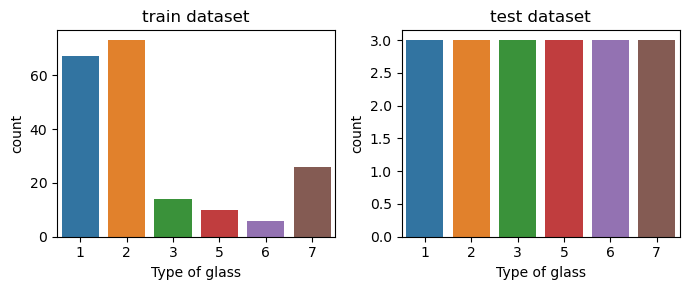

In [16]:
# Analysis of Distribution in Categorical dependent Variable

plt.rcParams["figure.figsize"] = [7.00, 3.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.countplot(train['Type of glass'], ax=axes[0]).set(title='train dataset')
sns.countplot(test['Type of glass'],ax=axes[1]).set(title='test dataset')
plt.show()

Observation:

Train Dataset seems to be categorically imblanced

Text(0.5, 0.98, ' Train Dataset Correlation Heatmap')

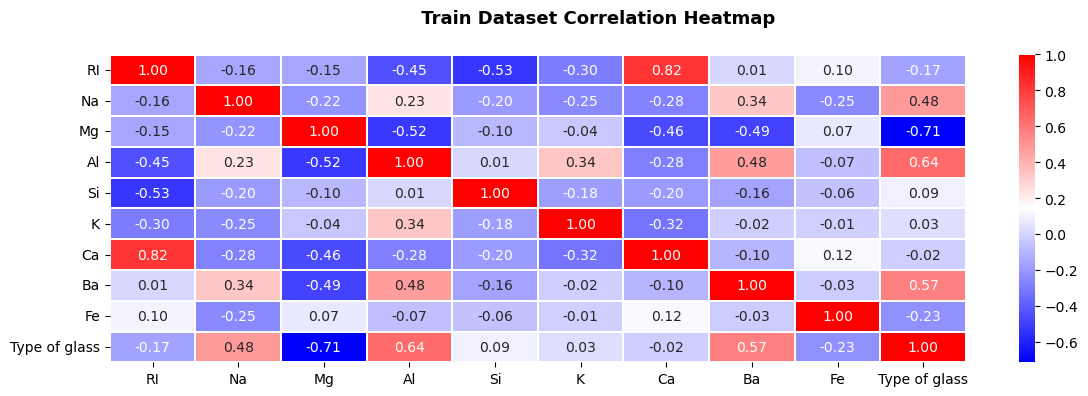

In [18]:
# Correlation (in train dataset)

fig, (ax) = plt.subplots(1, 1, figsize=(12,4)) 
hm = sns.heatmap(train.corr(),ax=ax,cmap="bwr",annot=True,fmt='.2f',linewidths=.05)
fig.subplots_adjust(top=0.5) 
fig.suptitle(' Train Dataset Correlation Heatmap', fontsize=13, fontweight='bold')

Observations:

We observe Na , Ba and AL is having positive corelation with categorical dependent variable Type of glass
Type of glass is having negative corelation with Mg

# Standardization of data

In [19]:
X_train = train.drop(columns = ['Type of glass']).values
y_train = train['Type of glass'].values

X_test = test.drop(columns = ['Type of glass']).values
y_test = test['Type of glass'].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting K-NN to the Training set to find best K value

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train_scaled,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=6)))

C:\Users\ashle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ashle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

K value  :  1  train score :  0.1326530612244898  score :  0.6220012626262627
K value  :  2  train score :  0.08673469387755102  score :  0.6218434343434344
K value  :  3  train score :  0.37244897959183676  score :  0.627209595959596
K value  :  4  train score :  0.15816326530612246  score :  0.6220012626262625


C:\Users\ashle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ashle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

K value  :  5  train score :  0.1377551020408163  score :  0.6223169191919191
K value  :  6  train score :  0.15816326530612246  score :  0.6379419191919191
K value  :  7  train score :  0.4387755102040816  score :  0.6278409090909091


C:\Users\ashle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ashle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

K value  :  8  train score :  0.1326530612244898  score :  0.6177398989898989
K value  :  9  train score :  0.1326530612244898  score :  0.6025883838383838
K value  :  10  train score :  0.1326530612244898  score :  0.6125315656565656
K value  :  20  train score :  0.1326530612244898  score :  0.6380997474747475


C:\Users\ashle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ashle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

from hit and trail, we found K = 6 is the best value for K (i,e best value of hyper parameter) and it has the highest cross validation score.

# KNN - model (distance metrics: Square Euclidean)

In [21]:
# Fitting KNN (K=6) to training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Square Euclidean
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [22]:
# Performance of KNN - model(distance metrics: Square Euclidean)

from sklearn.metrics import accuracy_score
euclidean_predict = classifier.predict(X_test_scaled)
ac = accuracy_score(y_test, euclidean_predict)
print("Accuracy Score of KNN with Eucledican Distance: {:.2f} ".format(ac))

Accuracy Score of KNN with Eucledican Distance: 0.56 


C:\Users\ashle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [23]:
# Classification Report of KNN - model(distance metrics: Square Euclidean)

from sklearn.metrics import classification_report
print(classification_report(y_test,euclidean_predict,zero_division=1))

              precision    recall  f1-score   support

           1       0.60      1.00      0.75         3
           2       0.29      0.67      0.40         3
           3       1.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.56        18
   macro avg       0.77      0.56      0.50        18
weighted avg       0.77      0.56      0.50        18



# KNN - model (distance metrics: Manhattan distance)

In [24]:
# Fitting KNN (K=6) to training set
from sklearn.neighbors import KNeighborsClassifier
manclassifier= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1) # Manhattan distance
manclassifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(p=1)

In [25]:
# Performance of KNN - model(distance metrics: Manhattan distance)

from sklearn.metrics import accuracy_score
manhattan_predict = manclassifier.predict(X_test_scaled)
ac = accuracy_score(y_test, manhattan_predict)
print("Accuracy Score of KNN with Manhattan Distance: {:.2f} ".format(ac))

Accuracy Score of KNN with Manhattan Distance: 0.56 


C:\Users\ashle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
# Classification Report of KNN - model(distance metrics: Manhattan distance)

from sklearn.metrics import classification_report
print(classification_report(y_test,manhattan_predict,zero_division=1))

              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.40      0.67      0.50         3
           3       1.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.56        18
   macro avg       0.76      0.56      0.49        18
weighted avg       0.76      0.56      0.49        18

